1.Framing the problem statement
--------------------------------------------------------------------------------
Here,we are trying to predict prices of the houses.
It is regression modelling.
Target variable is **SalePrice**

2.Hypothesis Testing
--------------------------------------------------------------------------------
Null Hypothesis:there is no relationship between predictor and target

Alternate Hypothesis:There is significant relationship between predictor and target


In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("train shape :",train.shape)
print("test shape :",test.shape)


print("train columns :",train.columns)
print("test columns :",test.columns)



train shape : (1460, 81)
test shape : (1459, 80)
train columns : Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCa

In [2]:
# get the categorical columns
catCols = train.select_dtypes("object").columns
catCols= list(set(catCols))
print("Categorcal columns :",catCols,len(catCols))

numCols=train.select_dtypes('number').columns
numCols = list(set(numCols))


# as salePrice is target ,so we will remove from numCols 
numCols.remove('SalePrice')
print("Numeric columns :",numCols,len(numCols))



Categorcal columns : ['GarageType', 'PoolQC', 'ExterCond', 'BldgType', 'LandSlope', 'MiscFeature', 'FireplaceQu', 'Functional', 'Utilities', 'Alley', 'Electrical', 'Fence', 'LandContour', 'KitchenQual', 'RoofMatl', 'GarageQual', 'MSZoning', 'BsmtCond', 'Neighborhood', 'MasVnrType', 'BsmtQual', 'Heating', 'BsmtFinType2', 'SaleCondition', 'HeatingQC', 'Exterior2nd', 'HouseStyle', 'LotConfig', 'GarageCond', 'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'ExterQual', 'Exterior1st', 'SaleType', 'Condition2', 'CentralAir', 'Street', 'Foundation', 'RoofStyle', 'LotShape', 'Condition1', 'PavedDrive'] 43
Numeric columns : ['BedroomAbvGr', 'ScreenPorch', 'BsmtHalfBath', 'YearRemodAdd', 'PoolArea', 'LotArea', 'OpenPorchSF', 'MasVnrArea', 'BsmtFullBath', 'LowQualFinSF', 'GarageArea', 'GrLivArea', 'MiscVal', 'Fireplaces', 'TotalBsmtSF', 'YrSold', 'LotFrontage', '3SsnPorch', 'BsmtFinSF1', 'WoodDeckSF', 'GarageCars', 'OverallCond', 'KitchenAbvGr', 'BsmtUnfSF', 'EnclosedPorch', 'FullBath', 'MoSold', 

In [3]:
# we will carry out z-test for Numeric columns as below

from statsmodels.stats import weightstats as stests

significant_num = []
in_significant_num = []
for i in numCols:
  p_val = stests.ztest(train[i],train.SalePrice)
  p_val = p_val[1]
  print('columns:',i)
  print('p val:',p_val)

  if p_val < 0.05 :
    status = "Reject Null Hypothesis,Significant predictors"
    print('status:',status)
    significant_num.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictors'
    print('status:',status)
    in_significant_num.append(i)

print(significant_num,len(significant_num))
print(in_significant_num,len(in_significant_num))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


columns: BedroomAbvGr
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: ScreenPorch
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: BsmtHalfBath
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: YearRemodAdd
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: PoolArea
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: LotArea
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: OpenPorchSF
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: MasVnrArea
p val: nan
status: Accept Null Hypothesis,Insignificant predictors
columns: BsmtFullBath
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: LowQualFinSF
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: GarageArea
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: GrLivArea
p val: 0.0
status: Reject Null Hypoth

In [4]:
# we wil carry out chi-square test for analysing categorical columns

from scipy.stats import chi2_contingency

significant_cat = []
in_significant_cat = []
for i in catCols:
  stat,p,dof,ex = chi2_contingency(pd.crosstab(train[i],train.SalePrice))
  
  print('columns:',i)

  if p_val < 0.05 :
    status = "Reject Null Hypothesis,Significant predictors"
    print('status:',status)
    significant_cat.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictors'
    print('status:',status)
    in_significant_cat.append(i)

print(significant_cat,len(significant_cat))
print(in_significant_cat,len(in_significant_cat))


columns: GarageType
status: Reject Null Hypothesis,Significant predictors
columns: PoolQC
status: Reject Null Hypothesis,Significant predictors
columns: ExterCond
status: Reject Null Hypothesis,Significant predictors
columns: BldgType
status: Reject Null Hypothesis,Significant predictors
columns: LandSlope
status: Reject Null Hypothesis,Significant predictors
columns: MiscFeature
status: Reject Null Hypothesis,Significant predictors
columns: FireplaceQu
status: Reject Null Hypothesis,Significant predictors
columns: Functional
status: Reject Null Hypothesis,Significant predictors
columns: Utilities
status: Reject Null Hypothesis,Significant predictors
columns: Alley
status: Reject Null Hypothesis,Significant predictors
columns: Electrical
status: Reject Null Hypothesis,Significant predictors
columns: Fence
status: Reject Null Hypothesis,Significant predictors
columns: LandContour
status: Reject Null Hypothesis,Significant predictors
columns: KitchenQual
status: Reject Null Hypothesis,Si

In [5]:
# NEED TO ReMOVE THIS

# # the we will see the OLS summary
# import statsmodels.api as sm
# a= train[['GarageArea', 'Id', 'BsmtFinSF1', 'MiscVal', 'OverallCond', 'FullBath', 'WoodDeckSF', 'MoSold', 'BsmtUnfSF', 'LotArea', 'GarageCars', 'LowQualFinSF', 'BedroomAbvGr', 'GrLivArea', 'MasVnrArea', 'BsmtFinSF2', 'PoolArea', 'OpenPorchSF', 'LotFrontage', '3SsnPorch', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'ScreenPorch', 'TotRmsAbvGrd', 'HalfBath', 'YrSold', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'Fireplaces', 'OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtFullBath', 'GarageYrBlt']]
# print(a)
# model=sm.OLS(train['SalePrice'],a).fit()
# model_prediction=model.predict(a)
# model.details = model.summary()

# # print(model.details)

3.Exploratory Data Analysis (EDA)
------------------------------------------------------------------

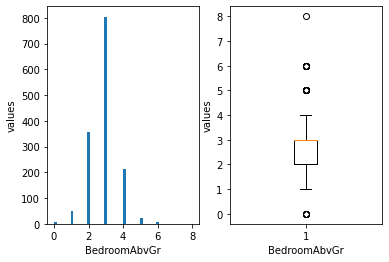

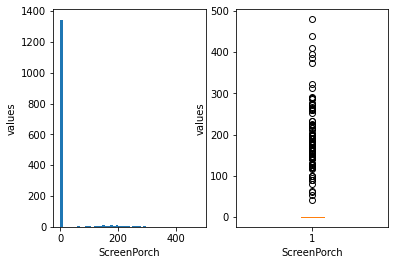

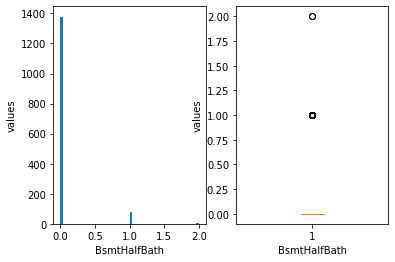

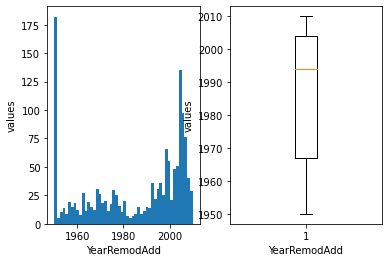

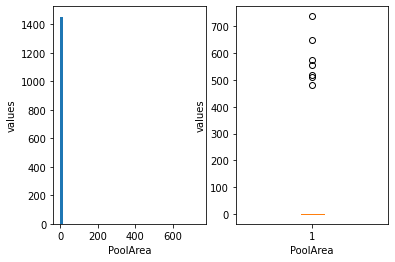

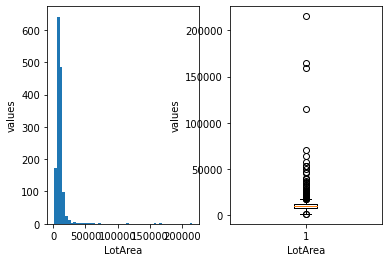

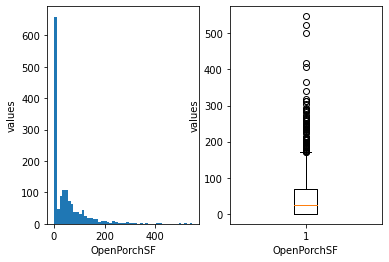

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


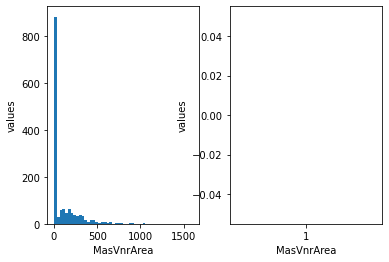

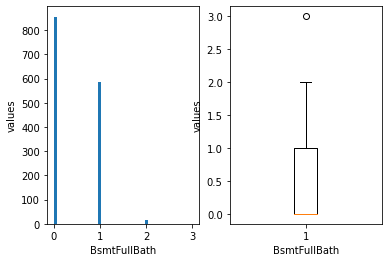

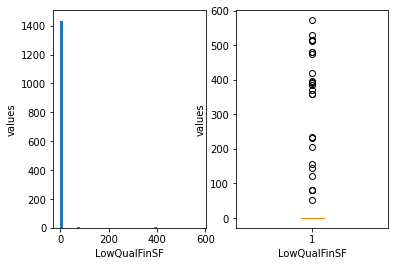

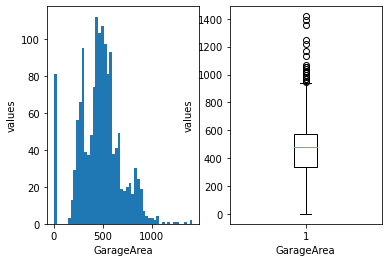

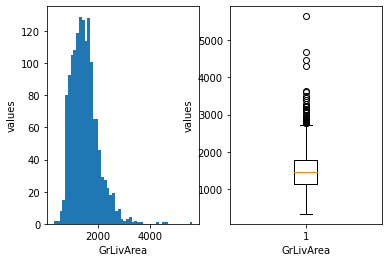

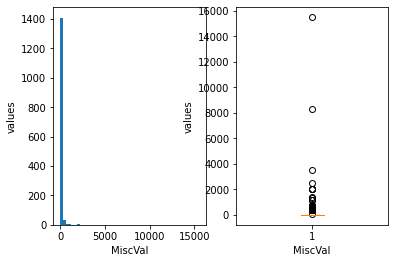

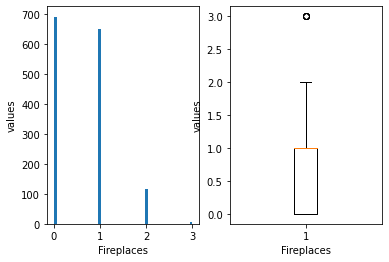

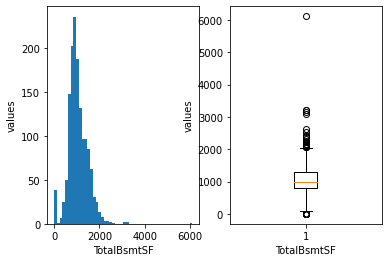

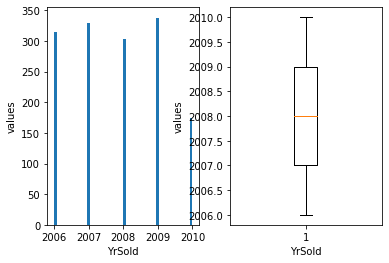

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


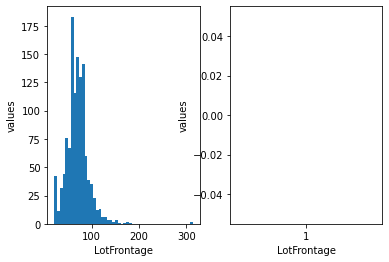

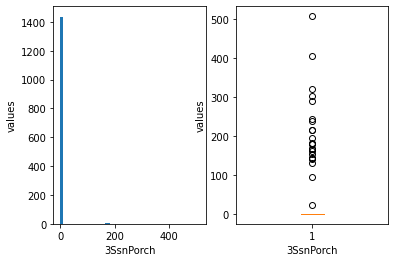

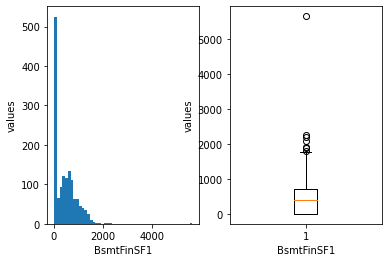

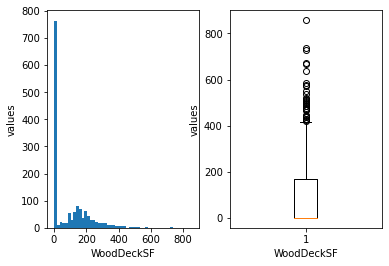

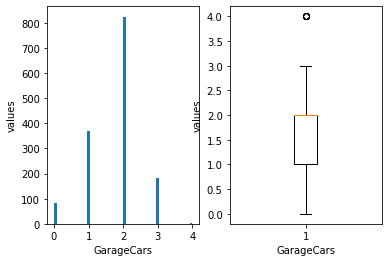

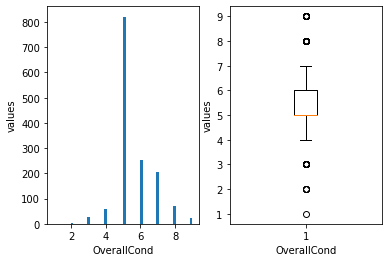

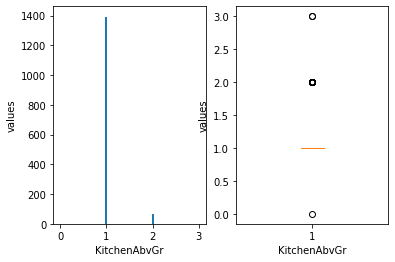

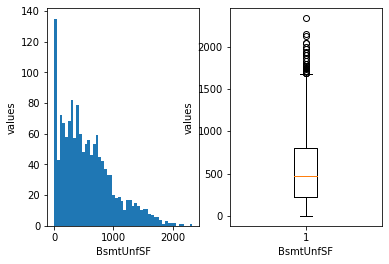

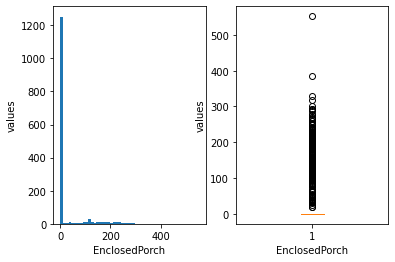

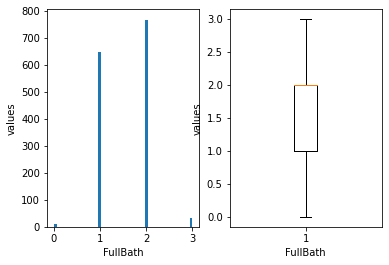

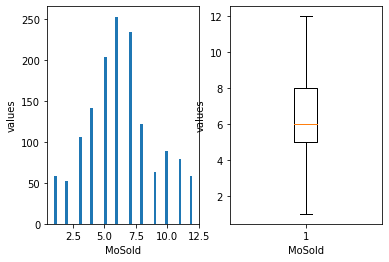

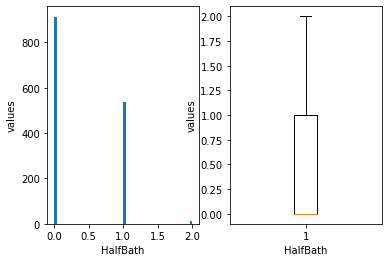

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


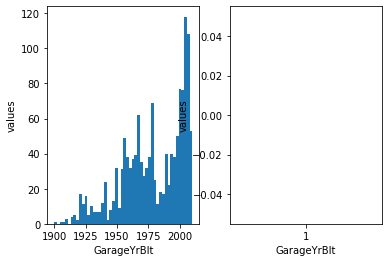

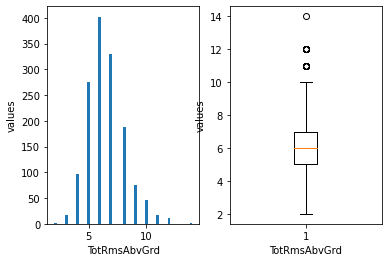

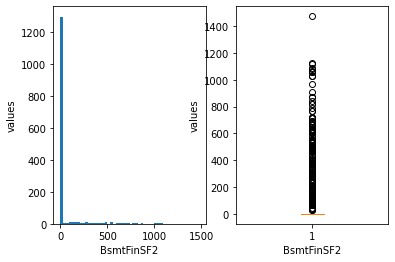

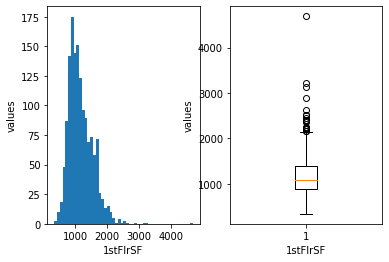

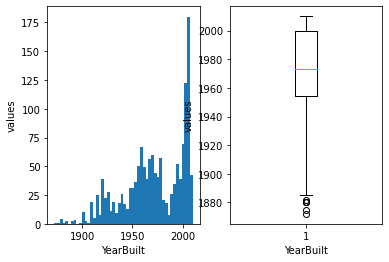

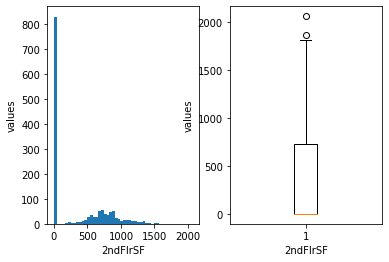

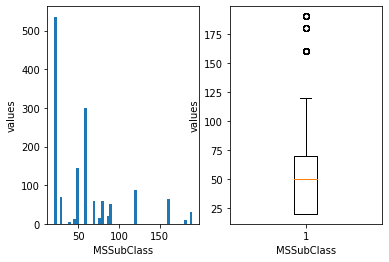

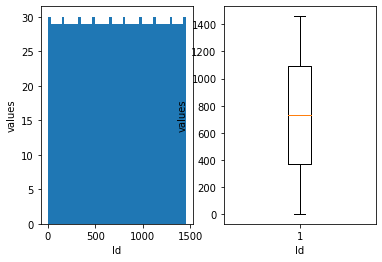

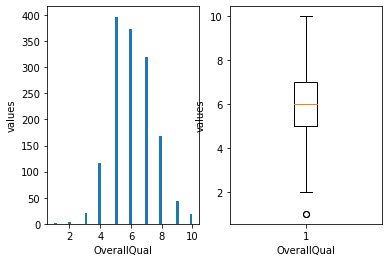

In [6]:
# Univariate Analysis
# 1. Numerical columns with histogram / distplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(train[i],bins=50)
  plt.xlabel(i)
  plt.ylabel('values')

  plt.subplot(1,2,2)
  plt.boxplot(train[i])
  plt.xlabel(i)
  plt.ylabel('values')

  plt.show()

In [7]:
# noted:outliers are present in the data

# Univariate Analysis
# 1. Categorical columns by value_counts

for i in catCols:
  print('columns:',i)
  print(train[i].value_counts())
  print('-------------------------------------------------------------------------')




columns: GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
-------------------------------------------------------------------------
columns: PoolQC
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
-------------------------------------------------------------------------
columns: ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
-------------------------------------------------------------------------
columns: BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
-------------------------------------------------------------------------
columns: LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-------------------------------------------------------------------------
columns: MiscFeature
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
--------------

                     Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  

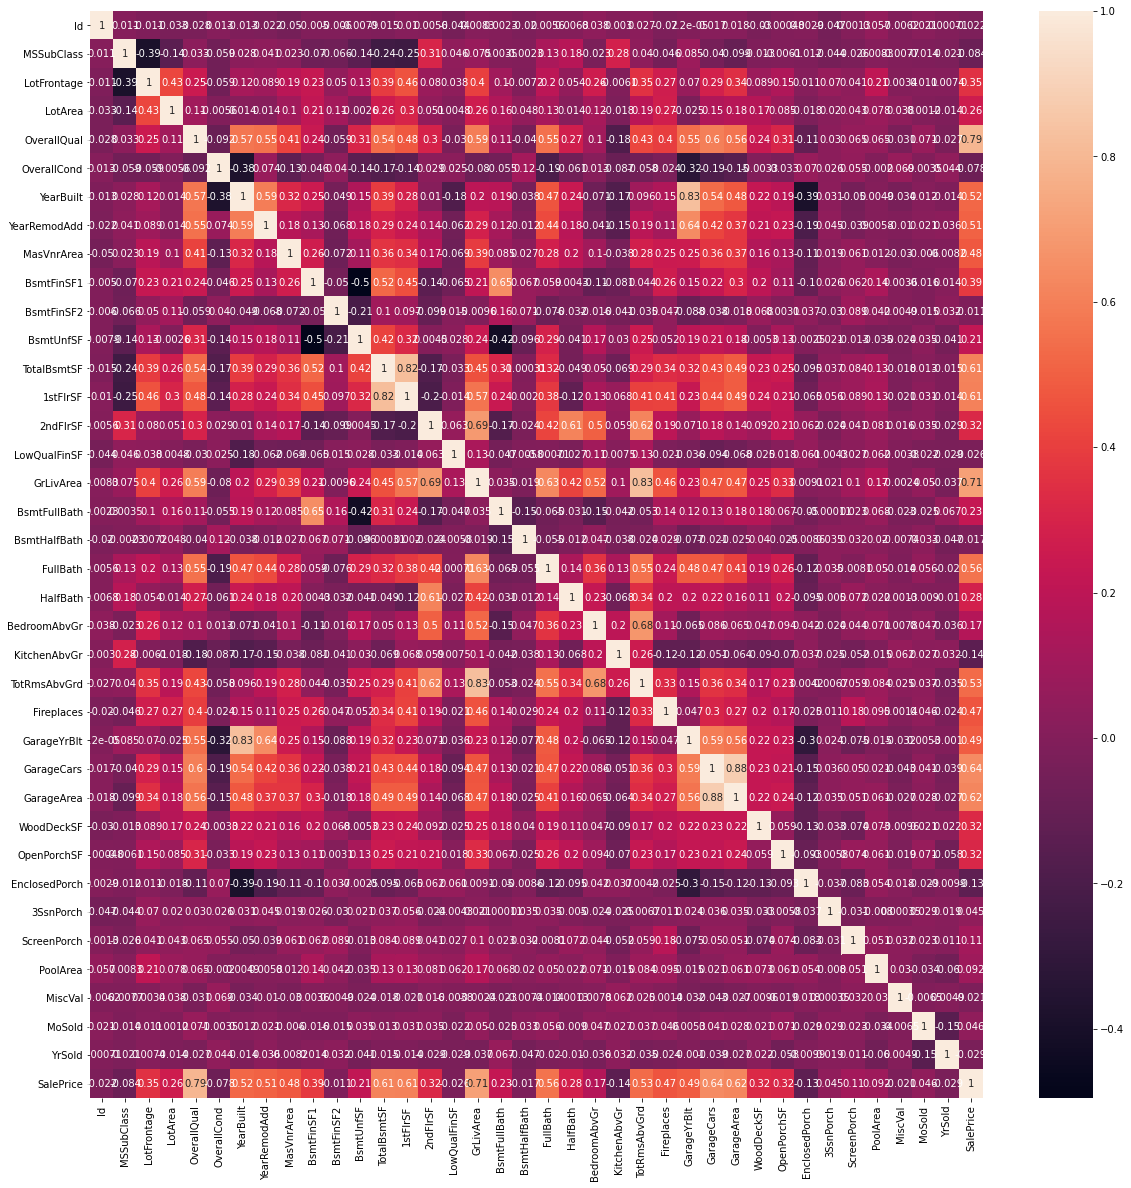

In [8]:
# Bi-variate analysis
# 1.Numerical columns by correlation matrix 
import seaborn as sns

matrix = train.corr()
print(matrix)

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(matrix,annot = True)

In [9]:
# # Bi-variate analysis
# 1.Categorical columns by crosstab 

# for i in catCols:
#   category = pd.crosstab(train[i],train['SalePrice'])
#   category.div(category.sum(1).astype(float),axis = 0).plot(kind='bar',stacked = True)
#   plt.show()

4.Towards building the model
-------------------------------------------------------------
---------------------------------------Data Cleansing

In [10]:
na = train.shape[0]
nb = test.shape[0]

data = pd.concat((train,test),sort=False).reset_index(drop=True)
print(data.columns,data.shape)

# drop the SalePrice as it is target and Id column as it is unique for eaach row and irrevelant in prediction
data.drop(['SalePrice'],axis =1,inplace = True)
data.drop(['Id'],axis=1,inplace = True)

print('Total size of data is:',data.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

5.Missing Values
---------------------------------------------------------------

In [11]:
print(data.isnull().sum())
print(data.isnull().mean()*100)

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
Length: 79, dtype: float64


In [12]:
def msv1(data,thresh=20,color='black',edgecolor='black',width=15,height=3):
  plt.figure(figsize=(width,height))
  percentage = (data.isnull().mean())*100
  percentage.sort_values(ascending=False).plot.bar(color=color,edgecolor=edgecolor)
  plt.axhline(y=thresh,color='r',linestyle='-')
  plt.title('Missing Values percentage per column',fontsize=20,weight ='bold')

  plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
  
  plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')
  

  plt.xlabel('Columns',size=15,weight='bold')
  plt.ylabel('Missing values percentage',size=15,weight='bold')
  plt.yticks(weight='bold')

  return plt.show()


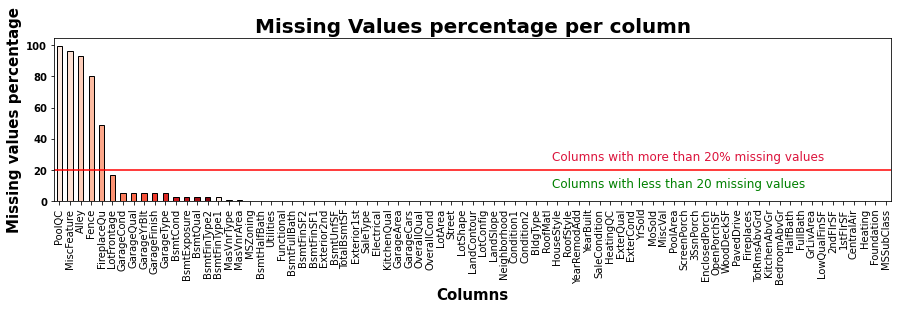

In [13]:
msv1(data,20,color=sns.color_palette('Reds',15))

**Handling Missing Values**
----------------------------------------------------------------------
we will remove the columns with missing values more than 20 %

In [14]:
data_copy=data.dropna(thresh=len(data)*0.8,axis=1)
print(f'we dropped {(data.shape[1] - data_copy.shape[1])} features in the combined set')
print('Dropped features are :',[x for x in data.columns if x not in data_copy.columns])
print(f'The shape of the combined dataset after dropping features with more than 80% M.V. {data_copy.shape}')

we dropped 5 features in the combined set
Dropped features are : ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
The shape of the combined dataset after dropping features with more than 80% M.V. (2919, 74)


In [15]:
allna = (data_copy.isnull().mean() ) * 100
allna=allna.drop(allna[allna == 0].index).sort_values()

# now visualising only missing values and their respective columns
def msv2(data_copy,color=('silver', 'gold','lightgreen','skyblue','lightpink'),edgecolor='black',width=16,height=8):
  fig, ax = plt.subplots(figsize=(width, height))

  allna = (data.isnull().mean())*100
  tightout= 0.008*max(allna)


  allna=allna.drop(allna[allna == 0].index).sort_values().reset_index()
  print(allna.shape)
  
  mn=ax.barh(allna.iloc[:,0],allna.iloc[:,1],color=color,edgecolor = edgecolor)
  ax.set_title('Missing values percentage per column',fontsize =15,weight = 'bold')
  ax.set_xlabel('Percentage',weight = 'bold',size =15 )
  ax.set_ylabel('Features with missing values', weight='bold')
  plt.yticks(weight='bold')
  plt.xticks(weight='bold')
  for i in ax.patches:
    
    ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',fontsize=10, fontweight='bold', color='grey')

  return plt.show()

(34, 2)


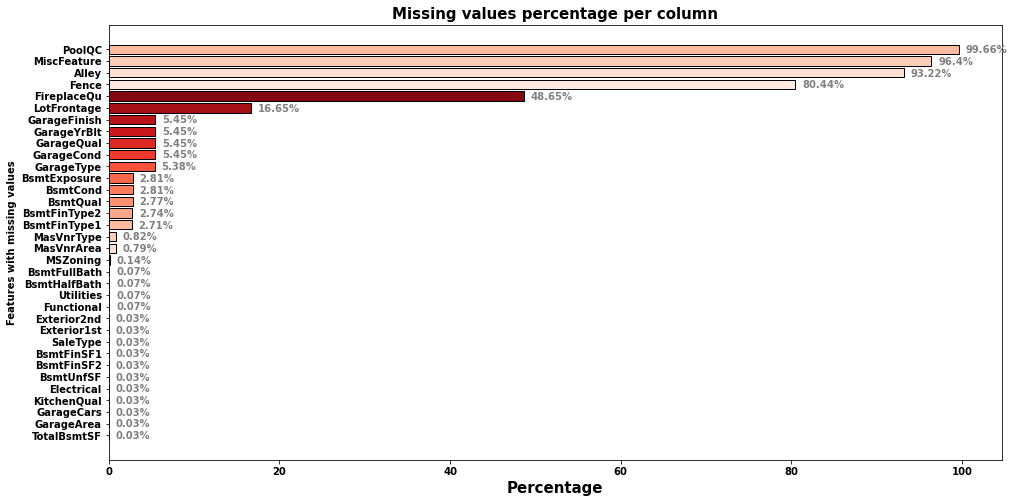

In [16]:
msv2(data_copy,color=sns.color_palette('Reds',15))

In [17]:
print(f'The shape of the combined dataset after dropping features with more than 80% M.V. {data_copy.shape}')

The shape of the combined dataset after dropping features with more than 80% M.V. (2919, 74)


Splitting the missing values into categorical and Numeriacl column for better treatment

In [18]:
NA=data_copy[allna.index.to_list()]
# splitting in categorical and numerical columns

NAcat = NA.select_dtypes(include='object')
NAnum = NA.select_dtypes(exclude='object')

print(f'we have : {NAcat.shape[1]} categorical features with missing values')
print(f'we have : {NAnum.shape[1]} numerical features with missing values')

print('çategorical columns with nA :',NAcat.columns)
print('numerical columns with nA :',NAnum.columns)


we have : 18 categorical features with missing values
we have : 11 numerical features with missing values
çategorical columns with nA : Index(['KitchenQual', 'Electrical', 'SaleType', 'Exterior1st', 'Exterior2nd',
       'Utilities', 'Functional', 'MSZoning', 'MasVnrType', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageType',
       'GarageCond', 'GarageFinish', 'GarageQual'],
      dtype='object')
numerical columns with nA : Index(['BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'BsmtHalfBath', 'BsmtFullBath', 'MasVnrArea',
       'GarageYrBlt', 'LotFrontage'],
      dtype='object')


Treating numerical columns with missing values
--------------------------------------------------------------------

In [19]:

for i in NAnum.columns:
  
  median_value = int(data_copy[i].median())
  print(i+' - median val-',median_value)
  data_copy[i].fillna(median_value,inplace=True)



BsmtUnfSF - median val- 467
GarageArea - median val- 480
GarageCars - median val- 2
TotalBsmtSF - median val- 989
BsmtFinSF2 - median val- 0
BsmtFinSF1 - median val- 368
BsmtHalfBath - median val- 0
BsmtFullBath - median val- 0
MasVnrArea - median val- 0
GarageYrBlt - median val- 1979
LotFrontage - median val- 68


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Treating categorical columns with missing values
----------------------------------------------------------------------

In [20]:
for i in NAcat:
  mode_value = (data_copy[i].mode()[0])
  print(i+' - mode val-',mode_value)
  data_copy[i].fillna(mode_value,inplace=True)


KitchenQual - mode val- TA
Electrical - mode val- SBrkr
SaleType - mode val- WD
Exterior1st - mode val- VinylSd
Exterior2nd - mode val- VinylSd
Utilities - mode val- AllPub
Functional - mode val- Typ
MSZoning - mode val- RL
MasVnrType - mode val- None
BsmtFinType1 - mode val- Unf
BsmtFinType2 - mode val- Unf
BsmtQual - mode val- TA
BsmtCond - mode val- TA
BsmtExposure - mode val- No
GarageType - mode val- Attchd
GarageCond - mode val- TA
GarageFinish - mode val- Unf
GarageQual - mode val- TA


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Feature Engineering:


In [21]:
data_copy['TotalArea'] = data_copy['TotalBsmtSF'] + data_copy['1stFlrSF'] + data_copy['2ndFlrSF'] + data_copy['GrLivArea'] +data_copy['GarageArea']

data_copy['Bathrooms'] = data_copy['FullBath'] + data_copy['HalfBath']*0.5 

data_copy['Year average']= (data_copy['YearRemodAdd']+data_copy['YearBuilt'])/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

6.Encoding categorical features:
---------------------------------------------------------------


In [22]:
# 1.Numerical features:

print(numCols)
# numCols = numCols.remove('Id')
for i in numCols:
  if i in data_copy.columns:
    print(data_copy[i].value_counts())

['BedroomAbvGr', 'ScreenPorch', 'BsmtHalfBath', 'YearRemodAdd', 'PoolArea', 'LotArea', 'OpenPorchSF', 'MasVnrArea', 'BsmtFullBath', 'LowQualFinSF', 'GarageArea', 'GrLivArea', 'MiscVal', 'Fireplaces', 'TotalBsmtSF', 'YrSold', 'LotFrontage', '3SsnPorch', 'BsmtFinSF1', 'WoodDeckSF', 'GarageCars', 'OverallCond', 'KitchenAbvGr', 'BsmtUnfSF', 'EnclosedPorch', 'FullBath', 'MoSold', 'HalfBath', 'GarageYrBlt', 'TotRmsAbvGrd', 'BsmtFinSF2', '1stFlrSF', 'YearBuilt', '2ndFlrSF', 'MSSubClass', 'Id', 'OverallQual']
3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64
0      2663
144      13
192      11
168      10
120       9
       ... 
490       1
576       1
53        1
63        1
264       1
Name: ScreenPorch, Length: 121, dtype: int64
0.0    2744
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1981     12
1986     12
1983     11
1982      9
Na

In [23]:
data_copy['MoSold'] = data_copy['MoSold'].astype(str)
data_copy['MSSubClass'] = data_copy['MSSubClass'].apply(str)
data_copy['YrSold'] = data_copy['YrSold'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

One Hot Encoding

In [24]:
data_update = pd.get_dummies(data_copy)
print(f"the shape of the original dataset {data_copy.shape}")
print(f"the shape of the encoded dataset {data_update.shape}")
print(f"We have {data_update.shape[1]- data_copy.shape[1]} new encoded features")

the shape of the original dataset (2919, 77)
the shape of the encoded dataset (2919, 303)
We have 226 new encoded features


In [25]:
# splitting train test
Train = data_update[:na]
Test = data_update[na:]

In [26]:
outlier_colums = ['GarageYrBlt','MasVnrArea','BsmtUnfSF','GarageCars','EnclosedPorch','YearBuilt','GrLivArea','3SsnPorch','OverallQual','HalfBath','WoodDeckSF','BsmtFullBath','BsmtFinSF1','KitchenAbvGr','PoolArea','Fireplaces','FullBath','GarageArea','BsmtFinSF2','TotRmsAbvGrd','ScreenPorch','LotFrontage','BedroomAbvGr','OverallCond','LowQualFinSF','OpenPorchSF','YearRemodAdd','TotalBsmtSF','BsmtHalfBath','LotArea','MiscVal','1stFlrSF','2ndFlrSF']
# remove ID
# MSSubClass
# YrSold
# MoSold

# len(outlier_colums)

# for i in outlier_colums:
#   Train[i] = np.log(Train[i])
#   plt.subplot(1,2,1)
#   plt.boxplot(Train[i])

#   # plt.subplot(1,2,2)
#   # plt.hist(Train[i],bins=50)


#   plt.show()

print(data_update.shape)
print(Train.shape)
print(Test.shape)

(2919, 303)
(1460, 303)
(1459, 303)


In [27]:
# Q1 = data_update.quantile(0.25)
# Q3 = data_update.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# # ------------------------WRONG
# treat_out = data_update[((data_update < (Q1 - 1.5 * IQR)) |(data_update > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(treat_out.shape)

In [28]:
# from scipy import stats
# z = np.abs(stats.zscore(data_update))
# print(z)

# new = data_update[(z < 3).all(axis=1)]
# new.shape

In [29]:
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor()

# yhat = lof.fit_predict(Train)

In [31]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
data1 = Train.values
X,y = data1[: , :],train['SalePrice']
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(1460, 303) (1460,)
(978, 303) (978,)
(945, 303) (945,)


Machine Learning:


In [32]:
# we will import robust scaler as its is powerfulagainst outliers
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()

In [33]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(Test)

In [34]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from numpy import abs
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

models = []
names = []

models.append(('Linear Regression',LinearRegression()))
models.append(('Decision Tree',DecisionTreeRegressor()))
# models.append(('Random Forest',RandomForestRegressor()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,X_train,y_train,cv = 20,scoring='neg_mean_squared_error')
  cv_score = np.sqrt(np.abs(cv_score))

  # to calculate rmse
  model.fit(X_train,y_train)
  y_pred = model.predict(X_train)

  rmse = np.sqrt(mean_squared_error(y_train,y_pred))
  mae = mean_absolute_error(y_train,y_pred)
  print("---------------------------------")
  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print('rmse:',rmse)
  print('mae:',mae)

---------------------------------
name:--->> Linear Regression
----------------------------------
CV mean Score :1159841534.6899223,CV min:16559.159591131986,CV std :1922215211.3137927
rmse: 17712.982649432168
mae: 12002.322480636678
---------------------------------
name:--->> Decision Tree
----------------------------------
CV mean Score :34792.05365016974,CV min:25444.900828391266,CV std :5088.2521312948
rmse: 0.0
mae: 0.0


Selecting a model
------------------------------------------------------------------------

In [35]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_train)

# rmse = np.sqrt(mean_squared_error(y_train,y_pred))
# mae = mean_absolute_error(y_train,y_pred)

# print("RMSE:",rmse)
# print("MAE:",mae)


def calculateScores(y_pred):
    return "RMSE:{0},MAE:{1}".format(np.sqrt(mean_squared_error(y_train,y_pred)),mean_absolute_error(y_train,y_pred))

calculateScores(y_pred)

'RMSE:17712.982649432168,MAE:12002.322480636678'

Regularisation
-------------------------------------------------------------
Our goal is to minimize the error, we use regularization methods:
 **Ridge**, 
 **Lasso** and 
 **ElasticNet**, in order to lower the squared error.

In [ ]:
# Next we try Lasso regularization: Similar procedure as ridge regularization but Lasso tends to have a lot of 0 entries in it and just few nonzeros (easy selection). In other words, lasso drops the uninformative features and keeps just the important ones.
# As with Ridge regularization, we need to find the alpha parameter that penalizes the error

Ridge regression:Minimize squared error + a term alpha that penalizes the error,We need to find a value of alpha that minimizes the train and test error (avoid overfitting)

In [36]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge
import math

ridge = Ridge()
parameters = {'alpha':[x for x in range(101)]}

ridge_reg = model_selection.GridSearchCV(ridge,param_grid = parameters,scoring = 'neg_mean_squared_error',cv = 15)
ridge_reg.fit(X_train,y_train)
print(f"The best value of Alpha is: {ridge_reg.best_params_}")
print(f"The best score achieved with Alpha=11 is: {math.sqrt(-ridge_reg.best_score_)}")

ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is: {'alpha': 10}
The best score achieved with Alpha=11 is: 24269.377649569306


In [37]:
ridge_mod=Ridge(alpha=15)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
# y_pred_test=ridge_mod.predict(x_test)

calculateScores(y_pred_train)

'RMSE:19644.806123839026,MAE:12920.640549055202'

In [39]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(X_train,y_train)
y_lasso_pred=lasso_mod.predict(X_train)
# y_lasso_test=lasso_mod.predict(X_test)

# print(f'Root Mean Square Error train  {str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))}')
print(f'Root Mean Square Error test  {calculateScores(y_lasso_pred)}')

Root Mean Square Error test  RMSE:17713.024926440317,MAE:12002.322462184824


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147723917315.91382, tolerance: 508657999.7178884
  positive)


In [40]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
def regularization(x,y,modelo=Ridge, scaler=RobustScaler):
    """"
    Function to automate regression with regularization techniques:
    
    -x: the features
    -y: the target
    -modelo: Ridge(default), Lasso, ElasticNetCV
    -scaler: RobustScaler(default), MinMaxSclaer, StandardScaler
    
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    Contact: amineyamlahi@gmail.com
    """
    #Split the data to train/test
    # from sklearn.model_selection import train_test_split
    # x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)
    
    #Scale the data. RobustSclaer default
    # from sklearn.preprocessing import RobustScaler
    # from sklearn.preprocessing import MinMaxScaler
    # from sklearn.preprocessing import StandardScaler
    
    # scaler= scaler()
    # # transform "x_train"
    # x_train = scaler.fit_transform(x_train)
    # # transform "x_test"
    # # x_test = scaler.transform(x_test)
    # #Transform the test set
    # X_test= scaler.transform(Test)
    
    if modelo != ElasticNetCV:
        if modelo == Ridge:
            parameters= {'alpha':[x for x in range(1,101)]}
        elif modelo == Lasso:
            parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
            
        model=modelo()
            
        model=model_selection.GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
        model.fit(X_train,y_train)
        y_pred= model.predict(X_train)

        #print("The best value of Alpha is: ",model.best_params_)
        print("The best RMSE score achieved with %s is: %s " %(model.best_params_,calculateScores(y_pred)))
    elif modelo == ElasticNetCV:
        alphas = [0.000542555]
        l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

        elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

        elasticmod = elastic_cv.fit(X_train, y_train.ravel())
        ela_pred=elasticmod.predict(X_train)
        print("The best RMSE score achieved with alpha %s and l1_ratio %s is: %s "
              %(elastic_cv.alpha_,elastic_cv.l1_ratio_, calculateScores(ela_pred)))
        
            

  

In [41]:
regularization(X_train,y_train,Ridge)

The best RMSE score achieved with {'alpha': 10} is: RMSE:19247.12013904656,MAE:12775.652385169185 


In [42]:
regularization(X_train,y_train, Lasso)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135766000196.33754, tolerance: 488548569.1133612
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133953094252.31818, tolerance: 470960599.77750313
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127058886678.18138, tolerance: 475426806.87579006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1382436

KeyboardInterrupt: ignored

In [ ]:
regularization(X_train,y_train, ElasticNetCV)